In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

<AxesSubplot:xlabel='Sex', ylabel='Count'>

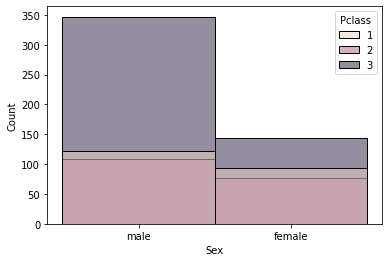

In [11]:
sns.histplot(data=titanic_df, x="Sex", hue="Pclass")

In [12]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return "Child"
    else:
        return sex

In [13]:
titanic_df["Person"] = titanic_df[["Age", "Sex"]].apply(male_female_child, axis=1)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

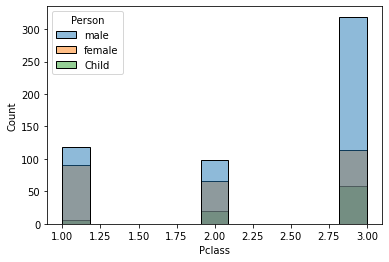

In [16]:
sns.histplot(data=titanic_df, x="Pclass", hue="Person")

<AxesSubplot:>

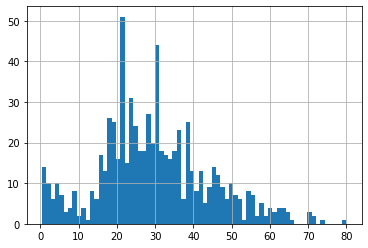

In [17]:
titanic_df["Age"].hist(bins=70)

In [18]:
titanic_df["Age"].mean()

29.69911764705882

In [19]:
titanic_df["Person"].value_counts()

male      537
female    271
Child      83
Name: Person, dtype: int64

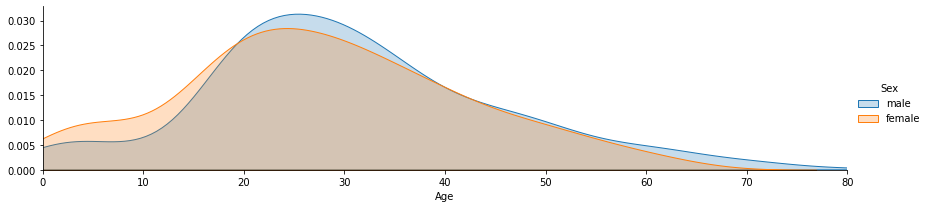

In [21]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

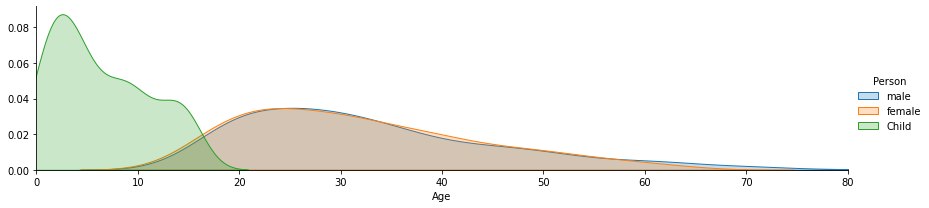

In [22]:
fig = sns.FacetGrid(titanic_df, hue="Person", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

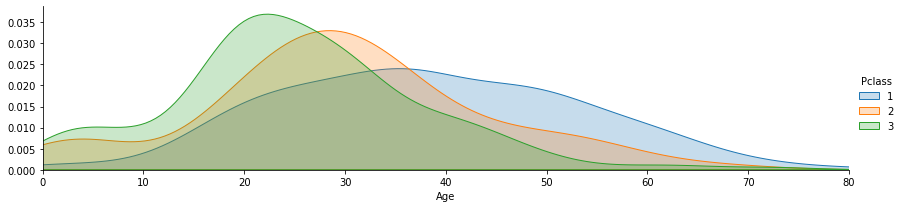

In [23]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [24]:
deck = titanic_df["Cabin"].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

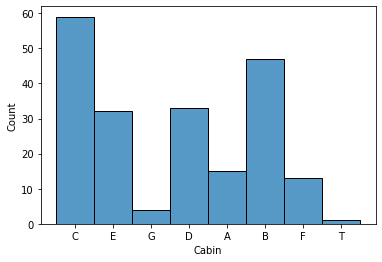

In [29]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ["Cabin"]
sns.histplot(x="Cabin", data=cabin_df, palette="winter_d")

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

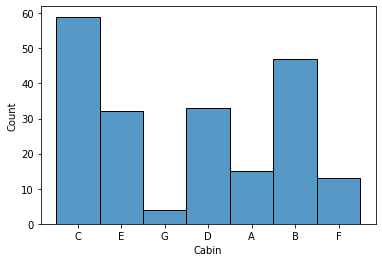

In [30]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]
sns.histplot(x="Cabin", data=cabin_df, palette="summer_d")

In [34]:
sns.factorplot(x="Embarked", data=titanic_df, hue="Pclass")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: Horizontal orientation requires numeric `x` variable.

In [36]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [37]:
titanic_df["Alone"].loc[titanic_df["Alone"] > 0] = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"] == 0] = "Alone"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='Count'>

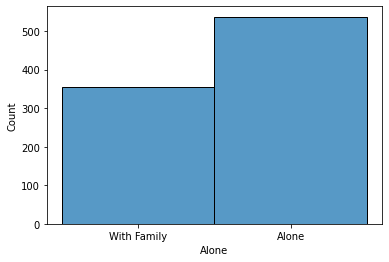

In [41]:
sns.histplot(x="Alone", data=titanic_df, palette="Blues")

In [42]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


<AxesSubplot:xlabel='Survivor', ylabel='Count'>

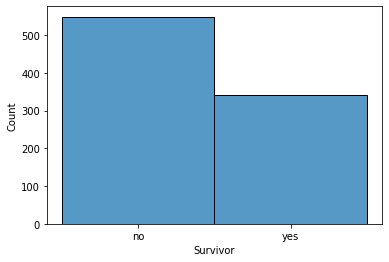

In [43]:
sns.histplot(x="Survivor", data=titanic_df, palette="Set1")

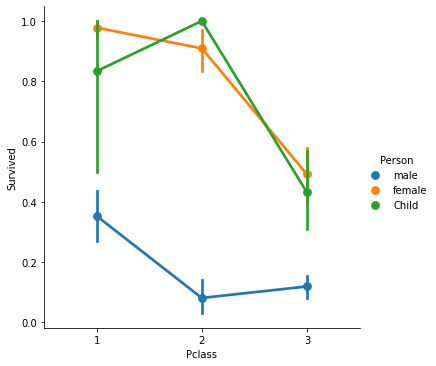

In [49]:
sns.factorplot(x="Pclass", y="Survived", hue="Person", data=titanic_df )

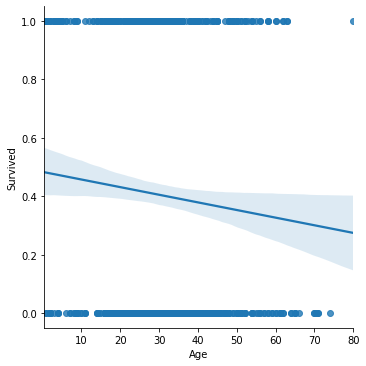

In [50]:
sns.lmplot(x="Age", y="Survived", data=titanic_df)

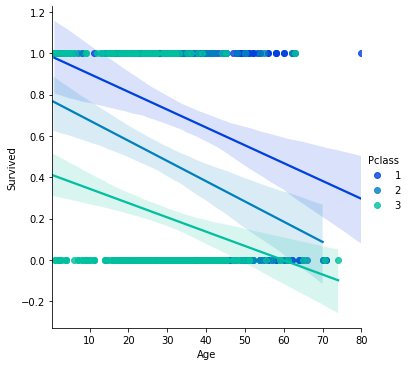

In [51]:
sns.lmplot(x="Age", y="Survived", hue="Pclass", data=titanic_df, palette="winter")

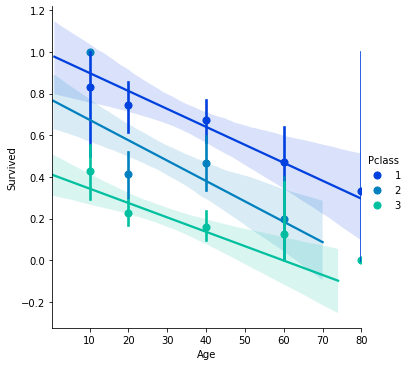

In [52]:
generations = [10, 20, 40, 60, 80]
sns.lmplot(x="Age", y="Survived", hue="Pclass", data=titanic_df, palette="winter", x_bins=generations)

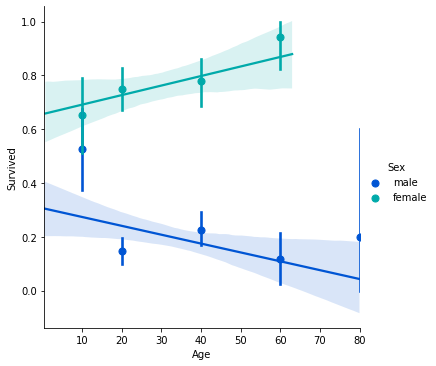

In [53]:
sns.lmplot(x="Age", y="Survived", hue="Sex", data=titanic_df, palette="winter", x_bins=generations)

1. Did the deck have an effect on the passenger survival rate? 
2. Did having a family member increase the odds of surviving the crash?

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [62]:
titanic_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


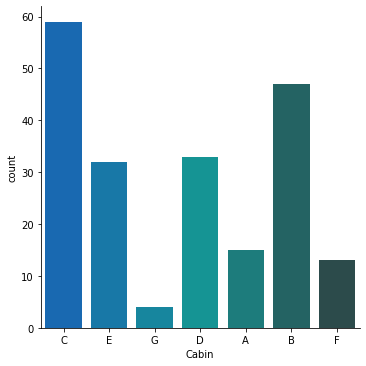

In [75]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

In [86]:
titanic_df_v1 = titanic_df.dropna(subset=["Cabin"])
titanic_df_v1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Child,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes


In [88]:
cabin_df["Survived"] = titanic_df_v1["Survived"]
cabin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cabin     203 non-null    object 
 1   Survived  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 14.8+ KB


In [89]:
cabin_df.dropna()

,Cabin,Survived
1,C,1.0
3,G,1.0
6,A,0.0
10,B,1.0
11,C,1.0
21,C,1.0
23,E,1.0
27,C,0.0
31,E,1.0
52,B,1.0


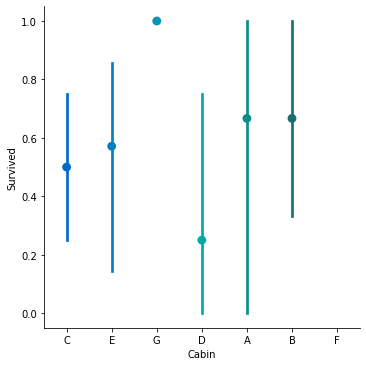

In [91]:
sns.factorplot('Cabin','Survived',data=cabin_df, palette='winter_d')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


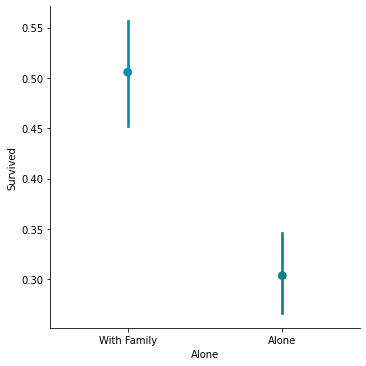

In [94]:
sns.factorplot("Alone","Survived", data=titanic_df, palette="winter_d")